In [1]:
# import tarfile
# import json
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date
from datetime import timedelta

In [54]:
import pandas as pd

df_business = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df_checkin = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)
df_tip = pd.read_json('yelp_academic_dataset_tip.json', lines=True)

In [5]:
# df_review_chunks = pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize = 1000)
# df_review = pd.DataFrame()
# for chunk in df_review_chunks:
#     df_review = pd.concat([df_review, chunk])

In [6]:
# df_user_chunks = pd.read_json('yelp_academic_dataset_user.json', lines=True, chunksize = 1000)
# df_user = pd.DataFrame()
# for chunk in df_user_chunks:
#     df_user = pd.concat([df_user, chunk])

In [366]:
df_business.head()

In [56]:
df_business.shape

(150346, 14)

In [57]:
df_business.isna().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

# Feature Engineering

### Extracting Hours

In [367]:
df_business.hours

In [59]:
df_business['hours'][1]

{'Monday': '0:0-0:0',
 'Tuesday': '8:0-18:30',
 'Wednesday': '8:0-18:30',
 'Thursday': '8:0-18:30',
 'Friday': '8:0-18:30',
 'Saturday': '8:0-14:0'}

In [60]:
df_business['hours'][2]

{'Monday': '8:0-22:0',
 'Tuesday': '8:0-22:0',
 'Wednesday': '8:0-22:0',
 'Thursday': '8:0-22:0',
 'Friday': '8:0-23:0',
 'Saturday': '8:0-23:0',
 'Sunday': '8:0-22:0'}

In [61]:
df_business['hours'][1]['Monday']

'0:0-0:0'

In [62]:
def hours_extraction(df, day):
    df[day] = np.nan
    for i in range(len(df.hours)):
        try:
            # check for errors
            df['hours'][i][day]
        except:
            continue
        else:
            # if no error, then value exists, so add
            df[day][i] = df['hours'][i][day]

In [368]:
hours_extraction(df_business, 'Monday')
hours_extraction(df_business, 'Tuesday')
hours_extraction(df_business, 'Wednesday')
hours_extraction(df_business, 'Thursday')
hours_extraction(df_business, 'Friday')
hours_extraction(df_business, 'Saturday')
hours_extraction(df_business, 'Sunday')

In [369]:
# df_business.head(10)

### Open on Weekends?

In [386]:
df_business['Saturday'].value_counts()

In [370]:
# df_business['Sunday'].value_counts()

In [371]:
df_business['Open Weekend'] = np.nan
for i in range(len(df_business)):
#     print(i)
    # if both are nans
    if pd.isnull(df_business['Saturday'][i]) and pd.isnull(df_business['Sunday'][i]):
        continue
    # if only saturday is nan
    elif pd.isnull(df_business['Saturday'][i]) and not(pd.isnull(df_business['Sunday'][i])):
        if (df_business['Sunday'][i] == '0:0-0:0'):
            df_business['Open Weekend'][i] = 0
        else:
            df_business['Open Weekend'][i] = 1
    # if only sunday is nan
    elif not(pd.isnull(df_business['Saturday'][i])) and pd.isnull(df_business['Sunday'][i]):
        if (df_business['Saturday'][i] == '0:0-0:0'):
            df_business['Open Weekend'][i] = 0
        else:
            df_business['Open Weekend'][i] = 1   
    # if neither are nans
    else:
        if (df_business['Saturday'][i] == '0:0-0:0') and (df_business['Sunday'][i] == '0:0-0:0'):
            df_business['Open Weekend'][i] = 0
        else:
            df_business['Open Weekend'][i] = 1
        

In [68]:
df_business['Open Weekend'].value_counts(dropna=False)

1.0    104392
NaN     38949
0.0      7005
Name: Open Weekend, dtype: int64

### Extracting start and end time

In [ ]:
# df_business['Monday open time'] = np.nan
# df_business['Monday close time'] = np.nan

# for i in range(len(df_business)):
#     if not(pd.isnull(df_business['Monday'][i])):
#         df_business['Monday open time'][i] = df_business['Monday'][i].split('-')[0]
#         df_business['Monday close time'][i] = df_business['Monday'][i].split('-')[1]
#     else:
#         continue

In [69]:
def extract_start_end_time(open_time, close_time, day, df):
    df[open_time] = np.nan
    df[close_time] = np.nan

    for i in range(len(df_business)):
        if not(pd.isnull(df_business[day][i])):
            df[open_time][i] = df[day][i].split('-')[0]
            df[close_time][i] = df[day][i].split('-')[1]
        else:
            continue

In [372]:
extract_start_end_time('Monday open time', 'Monday close time', 'Monday', df_business)
extract_start_end_time('Tuesday open time', 'Tuesday close time', 'Tuesday', df_business)
extract_start_end_time('Wednesday open time', 'Wednesday close time', 'Wednesday', df_business)
extract_start_end_time('Thursday open time', 'Thursday close time', 'Thursday', df_business)
extract_start_end_time('Friday open time', 'Friday close time', 'Friday', df_business)
extract_start_end_time('Saturday open time', 'Saturday close time', 'Saturday', df_business)
extract_start_end_time('Sunday open time', 'Sunday close time', 'Sunday', df_business)

In [373]:
# df_business.head(5)

### Duration open each day

In [72]:
def extract_duration(duration, open_time, close_time, day, df):
    
    df[duration] = np.nan
    
    for i in range(len(df)):
        if not(pd.isnull(df[day][i])):
            
            open_time_i = datetime.strptime(df[open_time][i], '%H:%M').time()
            close_time_i = datetime.strptime(df[close_time][i], '%H:%M').time()
    
            df[duration][i] = datetime.combine(date.today(), close_time_i) - datetime.combine(date.today(), open_time_i)
        
        else:
            continue

In [374]:
extract_duration('Monday duration', 'Monday open time', 'Monday close time', 'Monday', df_business)
extract_duration('Tuesday duration', 'Tuesday open time', 'Tuesday close time', 'Tuesday', df_business)
extract_duration('Wednesday duration', 'Wednesday open time', 'Wednesday close time', 'Wednesday', df_business)
extract_duration('Thursday duration', 'Thursday open time', 'Thursday close time', 'Thursday', df_business)
extract_duration('Friday duration', 'Friday open time', 'Friday close time', 'Friday', df_business)
extract_duration('Saturday duration', 'Saturday open time', 'Saturday close time', 'Saturday', df_business)
extract_duration('Sunday duration', 'Sunday open time', 'Sunday close time', 'Sunday', df_business)

In [375]:
# df_business.head(5)

In [76]:
df_business['Monday duration'][1]

datetime.timedelta(0)

### Total Duration

In [ ]:
# sum duration on weekdays and weekends 
# total duration and open on weekend/not

In [269]:
df_business['Monday duration'] = df_business['Monday duration'].fillna(pd.Timedelta(0))
df_business['Tuesday duration'] = df_business['Tuesday duration'].fillna(pd.Timedelta(0))
df_business['Wednesday duration'] = df_business['Wednesday duration'].fillna(pd.Timedelta(0))
df_business['Thursday duration'] = df_business['Thursday duration'].fillna(pd.Timedelta(0))
df_business['Friday duration'] = df_business['Friday duration'].fillna(pd.Timedelta(0))
df_business['Saturday duration'] = df_business['Saturday duration'].fillna(pd.Timedelta(0))
df_business['Sunday duration'] = df_business['Sunday duration'].fillna(pd.Timedelta(0))

In [276]:
for i in range(len(df_business)-1):
    if df_business['Monday duration'][i] < pd.Timedelta(0):
        df_business.at[i, 'Monday duration'] = df_business['Monday duration'][i] + pd.Timedelta(24, unit='h') 
    if df_business['Tuesday duration'][i] < pd.Timedelta(0):
        df_business.at[i, 'Tuesday duration'] = df_business['Tuesday duration'][i] + pd.Timedelta(24, unit='h') 
    if df_business['Wednesday duration'][i] < pd.Timedelta(0):
        df_business.at[i, 'Wednesday duration'] = df_business['Wednesday duration'][i] + pd.Timedelta(24, unit='h') 
    if df_business['Thursday duration'][i] < pd.Timedelta(0):
        df_business.at[i, 'Thursday duration'] = df_business['Thursday duration'][i] + pd.Timedelta(24, unit='h') 
    if df_business['Friday duration'][i] < pd.Timedelta(0):
        df_business.at[i, 'Friday duration'] = df_business['Friday duration'][i] + pd.Timedelta(24, unit='h') 
    if df_business['Saturday duration'][i] < pd.Timedelta(0):
        df_business.at[i, 'Saturday duration'] = df_business['Saturday duration'][i] + pd.Timedelta(24, unit='h') 
    if df_business['Sunday duration'][i] < pd.Timedelta(0):
        df_business.at[i, 'Sunday duration'] = df_business['Sunday duration'][i] + pd.Timedelta(24, unit='h') 

In [277]:
df_business['Total duration'] = df_business['Monday duration'] + df_business['Tuesday duration'] + df_business['Wednesday duration'] + df_business['Thursday duration'] + df_business['Friday duration'] + df_business['Saturday duration'] + df_business['Sunday duration']


In [273]:
df_business.shape

(150347, 46)

In [278]:
for i in df_business['Total duration']:
    if i < pd.Timedelta(0):
        print(i)

### Total Duration on Weekdays

In [261]:
# def weekday_time(row):
#     if not(pd.isnull(row['Monday duration'])) and not(pd.isnull(row['Tuesday duration'])) and not(pd.isnull(row['Wednesday duration'])) and not(pd.isnull(row['Thursday duration'])) and not(pd.isnull(row['Friday duration'])):
#         return row['Monday duration'] + row['Tuesday duration'] + row['Wednesday duration'] + row['Thursday duration'] + row['Friday duration']
#     elif (pd.isnull(row['Monday duration'])) and not(pd.isnull(row['Tuesday duration'])) and not(pd.isnull(row['Wednesday duration'])) and not(pd.isnull(row['Thursday duration'])) and not(pd.isnull(row['Friday duration'])):
#         return row['Tuesday duration'] + row['Wednesday duration'] + row['Thursday duration'] + row['Friday duration']
#     elif not(pd.isnull(row['Monday duration'])) and (pd.isnull(row['Tuesday duration'])) and not(pd.isnull(row['Wednesday duration'])) and not(pd.isnull(row['Thursday duration'])) and not(pd.isnull(row['Friday duration'])):
#         return row['Monday duration'] + row['Wednesday duration'] + row['Thursday duration'] + row['Friday duration']
#     elif not(pd.isnull(row['Monday duration'])) and not(pd.isnull(row['Tuesday duration'])) and (pd.isnull(row['Wednesday duration'])) and not(pd.isnull(row['Thursday duration'])) and not(pd.isnull(row['Friday duration'])):
#         return row['Monday duration'] + row['Tuesday duration'] + row['Thursday duration'] + row['Friday duration']
#     elif not(pd.isnull(row['Monday duration'])) and not(pd.isnull(row['Tuesday duration'])) and not(pd.isnull(row['Wednesday duration'])) and (pd.isnull(row['Thursday duration'])) and not(pd.isnull(row['Friday duration'])):
#         return row['Monday duration'] + row['Tuesday duration'] + row['Wednesday duration'] + row['Friday duration']
#     elif not(pd.isnull(row['Monday duration'])) and not(pd.isnull(row['Tuesday duration'])) and not(pd.isnull(row['Wednesday duration'])) and not(pd.isnull(row['Thursday duration'])) and (pd.isnull(row['Friday duration'])):
#         return row['Monday duration'] + row['Tuesday duration'] + row['Wednesday duration'] + row['Thursday duration']

In [262]:
# df_business['Weekday duration'] = np.nan
# df_business['Weekday duration'] = df_business.apply(lambda row: weekday_time(row), axis=1)

In [270]:
# df_business['Weekday nans'] = 0

In [87]:
# for i in range(len(df_business)):
#     if pd.isnull(df_business['Monday duration'][i]):
#         df_business['Weekday nans'][i] += 1
#     if pd.isnull(df_business['Tuesday duration'][i]):
#         df_business['Weekday nans'][i] += 1
#     if pd.isnull(df_business['Wednesday duration'][i]):
#         df_business['Weekday nans'][i] += 1
#     if pd.isnull(df_business['Thursday duration'][i]):
#         df_business['Weekday nans'][i] += 1
#     if pd.isnull(df_business['Friday duration'][i]):
#         df_business['Weekday nans'][i] += 1

In [387]:
# df_business['Weekday nans'].value_counts()

### Total Duration on Weekends

In [230]:
# def weekend_time(row):
#     if not(pd.isnull(row['Saturday duration'])) and not(pd.isnull(row['Sunday duration'])):
#         return row['Saturday duration'] + row['Sunday duration']
#     elif (pd.isnull(row['Saturday duration'])) and not(pd.isnull(row['Sunday duration'])):
#         return row['Sunday duration']
#     elif not(pd.isnull(row['Saturday duration'])) and (pd.isnull(row['Sunday duration'])):
#         return row['Saturday duration']

In [232]:
# df_business['Weekend duration'] = np.nan
# df_business['Weekend duration'] = df_business.apply(lambda row: weekend_time(row), axis=1)

In [62]:
# df_business['Monday'] = np.nan

In [61]:
# for i in range(len(df_business.hours)):
#     print(i)
#     try:
#         # check for errors
#         df_business['hours'][i]['Monday']
#     except:
#         continue
#         # if error
# #         df_business['Monday'][i] = 0
#     else:
#         # if no error, then value exists
#         df_business['Monday'][i] = df_business['hours'][i]['Monday']

In [63]:
# df_business.head(20)

# Connect df_review and df_business

In [377]:
# df_review.head()

In [81]:
df_review_0 = df_review[df_review['business_id'] == df_review['business_id'][0]]

In [378]:
# df_review_0.head()

In [88]:
df_review_0.shape

(175, 9)

In [89]:
df_review_0.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [83]:
df_business[df_business['business_id'] == df_review['business_id'][0]]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes,categories,hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
1867,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,...,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...",7:30-15:0,7:30-15:0,7:30-15:0,7:30-15:0,7:30-15:0,7:30-15:0,7:30-15:0


In [94]:
df_review_0[['stars']].mean()

stars    3.068571
dtype: float64

In [110]:
df_review_0[['useful', 'funny', 'cool']].sum()

91

In [95]:
(df_review_0[['useful', 'funny', 'cool']].sum()/df_review_0.shape[0] ) * 100

useful    52.000000
funny     13.142857
cool      14.857143
dtype: float64

# Extracting More Features

In [379]:
# df_business.head(10)

In [101]:
list(df_business['attributes'][0].keys())

['ByAppointmentOnly']

In [102]:
list(df_business['attributes'][1].keys())

['BusinessAcceptsCreditCards']

In [109]:
attribute_list = []
for i in range(len(df_business['attributes'])):
#     print(i)
    if df_business['attributes'][i] is None:
        continue
    else:
        attribut_list_i = list(df_business['attributes'][i].keys())
        attribute_list = attribute_list + attribut_list_i

In [380]:
# attribute_list

In [ ]:
attribute_unique = set(attribute_list)
attribute_unique

# Adding Census Tract Information

In [382]:
# df_business.head()

In [ ]:
# ACSDP5Y2020.DP05-Data.csv
# ACSST5Y2020.S0101-Data.csv
# ACSST5Y2020.S0502-Data.csv

In [113]:
df_census_1 = pd.read_csv('ACSDP5Y2020.DP05-Data.csv')
df_census_1.columns = df_census_1.iloc[0]
df_census_1 = df_census_1.iloc[1: , :]
df_census_1 = df_census_1.reset_index(drop = True)

In [122]:
df_census_2 = pd.read_csv('ACSST5Y2020.S0101-Data.csv')
df_census_2.columns = df_census_2.iloc[0]
df_census_2 = df_census_2.iloc[1: , :]
df_census_2 = df_census_2.reset_index(drop = True)

In [121]:
df_census_3 = pd.read_csv('ACSST5Y2020.S0502-Data.csv')
df_census_3.columns = df_census_3.iloc[0]
df_census_3 = df_census_3.iloc[1: , :]
df_census_3 = df_census_3.reset_index(drop = True)

In [163]:
# data cleaning column 1

In [169]:
columns_to_keep = ['Geographic Area Name',
                   'Estimate!!SEX AND AGE!!Total population',
                   'Estimate!!SEX AND AGE!!Total population!!Median age (years)',
                  'Estimate!!RACE!!Total population!!One race!!White',
                  'Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females)']

In [170]:
df_census_1_select = df_census_1[columns_to_keep]

In [383]:
df_census_1_select['postal_code'] = df_census_1_select['Geographic Area Name'].str[-5:]

In [172]:
df_census_1_select = df_census_1_select.drop(['Geographic Area Name'], axis=1)

In [173]:
df_census_1_select.columns = ['Total Population', 'Median Age', 'White Population', 'Sex Ratio', 'Postal Code']

In [177]:
df_census_1_select['Total Population'] = df_census_1_select['Total Population'].astype('int')
df_census_1_select['White Population'] = df_census_1_select['White Population'].astype('int')
df_census_1_select['Median Age'] = df_census_1_select['Median Age'].astype('float')
df_census_1_select['Sex Ratio'] = df_census_1_select['Sex Ratio'].astype('float')

In [183]:
df_census_1_select['Percentage White'] = (df_census_1_select['White Population'] /
                                          df_census_1_select['Total Population']) * 100

In [281]:
# left join
df_with_census = df_business.merge(df_census_1_select, left_on='postal_code', right_on='Postal Code', how='left')

In [282]:
df_business.shape

(150347, 46)

In [283]:
df_with_census.shape

(150347, 52)

In [284]:
df_with_census.describe()

,latitude,longitude,stars,review_count,is_open,Open Weekend,Monday duration,Tuesday duration,Wednesday duration,Thursday duration,...,Saturday duration,Sunday duration,Total duration,NaT,28,Total Population,Median Age,White Population,Sex Ratio,Percentage White
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000,111397.000000,150347,150347,150347,150347,...,150347,150347,150347,1,1,143622.000000,143381.000000,143622.000000,143390.00000,143414.000000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615,0.937117,0 days 05:41:07.913293913,0 days 07:35:02.109120900,0 days 07:46:19.626597138,0 days 07:49:11.331785802,...,0 days 06:41:01.852514516,0 days 04:37:54.980811057,2 days 00:03:16.855008746,0 days 08:00:00,0 days 08:00:00,30371.803763,39.216010,21529.049045,97.10261,71.948631
std,5.872759,14.918502,0.974421,121.120136,0.40286,0.242754,0 days 05:35:35.406033072,0 days 05:01:44.832542309,0 days 04:55:58.230469530,0 days 04:52:33.753859547,...,0 days 05:20:12.240196993,0 days 05:20:21.983411709,1 days 07:59:10.071035726,NaT,NaT,15407.357807,6.584495,11730.656211,22.52489,17.459161
min,27.555127,-120.095137,1.000000,5.000000,0.00000,0.000000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 08:00:00,0 days 08:00:00,0.000000,19.100000,0.000000,46.60000,0.599855
25%,32.187293,-90.357810,3.000000,8.000000,1.00000,1.000000,0 days 00:00:00,0 days 03:00:00,0 days 04:30:00,0 days 05:00:00,...,0 days 00:00:00,0 days 00:00:00,1 days 05:00:00,0 days 08:00:00,0 days 08:00:00,18468.000000,35.100000,12529.000000,90.00000,64.597491
50%,38.777413,-86.121179,3.500000,15.000000,1.00000,1.000000,0 days 07:00:00,0 days 09:00:00,0 days 09:00:00,0 days 09:00:00,...,0 days 08:00:00,0 days 00:00:00,2 days 02:00:00,0 days 08:00:00,0 days 08:00:00,28544.000000,38.500000,20696.000000,95.50000,76.088352
75%,39.954036,-75.421542,4.500000,37.000000,1.00000,1.000000,0 days 10:00:00,0 days 11:00:00,0 days 11:00:00,0 days 11:00:00,...,0 days 11:00:00,0 days 09:00:00,2 days 22:00:00,0 days 08:00:00,0 days 08:00:00,39317.000000,42.800000,28548.000000,100.80000,85.116784
max,53.679197,-73.200457,5.000000,7568.000000,1.00000,1.000000,0 days 23:59:00,0 days 23:59:00,0 days 23:59:00,0 days 23:59:00,...,0 days 23:59:00,0 days 23:59:00,6 days 23:53:00,0 days 08:00:00,0 days 08:00:00,99109.000000,85.100000,60605.000000,856.00000,100.000000


# Final Attributes:
### Restaurant Open/ Close:
- Total duration
- Open Weekend

### Census Tract
- Median Age
- Sex Ratio 
- Percentage White
- Total Population

# Final Cleaning and Merging

In [285]:
df_with_census.to_csv('df_business_with_census.csv')

In [287]:
df_with_census['business_id'].value_counts()

Pns2l4eNsfO8kk83dixA6A    1
twx6DPOgaD9CN8wlt4Jcbg    1
ogyKKg_D4ioc6Ech_pKqfw    1
9D0aKRGsutg8S0ClIanmrA    1
_XV_ug_IUiJrGfMiJUqz-Q    1
                         ..
WVYcB73fVpBMznlhhqjL4w    1
f9C3eDtfbQrFklCCLDFuaQ    1
WTkDTPmeR_LZn56-xDinZw    1
1uAgni70WHOW2CVOfRMurw    1
jV_XOycEzSlTx-65W906pg    1
Name: business_id, Length: 150346, dtype: int64

In [288]:
df_with_census.shape

(150347, 52)

In [209]:
restaurant_features = pd.read_csv('restaurant_features.csv')

In [289]:
df_final = df_with_census[['business_id', 
                           'Total duration',
                           'Open Weekend', 
                           'Median Age', 
                           'Total Population', 
                           'Sex Ratio', 
                           'Percentage White']]

In [384]:
# df_final.head()

In [291]:
restaurant_features.shape

(64616, 26)

In [292]:
df_export = restaurant_features.merge(df_final, left_on='business_id', right_on='business_id', how='left')

In [299]:
df_export = df_export.drop(columns = df_export.columns[0], axis=1)

In [303]:
df_export.to_csv('restaurant_features_all.csv', index=False)

In [307]:
df_export[['Percentage White', 'Sex Ratio', 'Total Population', 'Median Age', 'Open Weekend', 'Total duration']].describe()

,Percentage White,Sex Ratio,Total Population,Median Age,Open Weekend,Total duration
count,61177.000000,61163.000000,61246.000000,61160.000000,53728.000000,64616
mean,70.693466,97.297685,30097.838896,38.982216,0.963110,2 days 07:20:29.161507985
std,18.664267,24.586298,15683.636977,6.722132,0.188492,1 days 10:36:12.604976744
min,0.599855,47.400000,0.000000,19.100000,0.000000,0 days 00:00:00
25%,62.014950,89.800000,18004.000000,34.700000,1.000000,1 days 07:30:00
50%,74.954755,95.000000,28010.000000,38.200000,1.000000,2 days 13:00:00
75%,84.948101,100.800000,39239.000000,42.500000,1.000000,3 days 06:45:00
max,100.000000,856.000000,99109.000000,85.100000,1.000000,6 days 23:53:00


In [ ]:
df_export['Percentage White'].describe()

# Prediction Regression: Not Included in Report

In [308]:
df_export.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'avg_rating', 'review_id',
       'useful', 'funny', 'cool', 'median_rating', 'RestaurantsTakeOut',
       'BusinessParking', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'RestaurantsDelivery', 'Total duration',
       'Open Weekend', 'Median Age', 'Total Population', 'Sex Ratio',
       'Percentage White'],
      dtype='object')

In [341]:
df_export_2 = df_export.dropna()

In [343]:
y = df_export_2[['avg_rating']]

In [344]:
X = df_export_2[['useful', 'funny', 'cool', 'RestaurantsTakeOut',
       'BusinessParking', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'RestaurantsDelivery', 
       'Open Weekend', 'Median Age', 'Total Population', 'Sex Ratio',
       'Percentage White']]

In [353]:
from sklearn.preprocessing import MinMaxScaler

In [356]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [347]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [361]:
svr = SVR().fit(X_train, y_train)

/Users/ridhikaagrawal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [362]:
yfit = svr.predict(X_test)

In [363]:
score = svr.score(X_test,y_test)
print("R-squared:", score)
print("MSE:", mean_squared_error(y_test, yfit))

R-squared: 0.06468998584092323
MSE: 0.6413388188288494


In [364]:
score = svr.score(X_train, y_train)
print("R-squared:", score)
# print("MSE:", mean_squared_error(y_test, yfit))

R-squared: 0.0735599008748905


# Figures

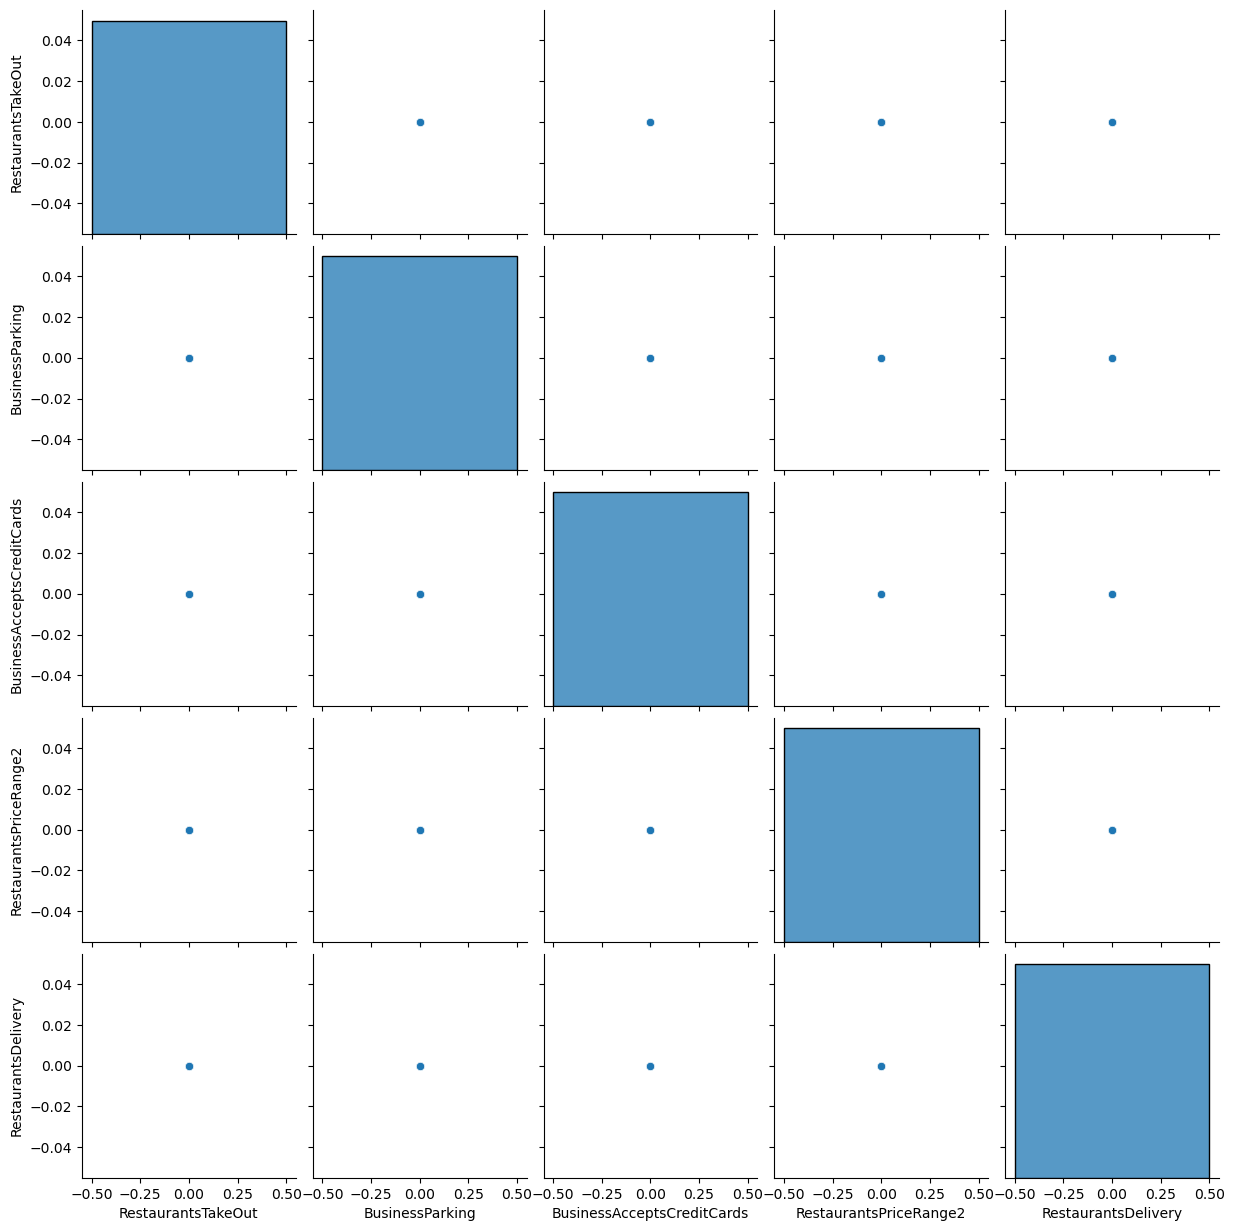

In [365]:
# import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_export[['RestaurantsTakeOut','BusinessParking', 
                        'BusinessAcceptsCreditCards','RestaurantsPriceRange2',
                        'RestaurantsDelivery']])
plt.show() 

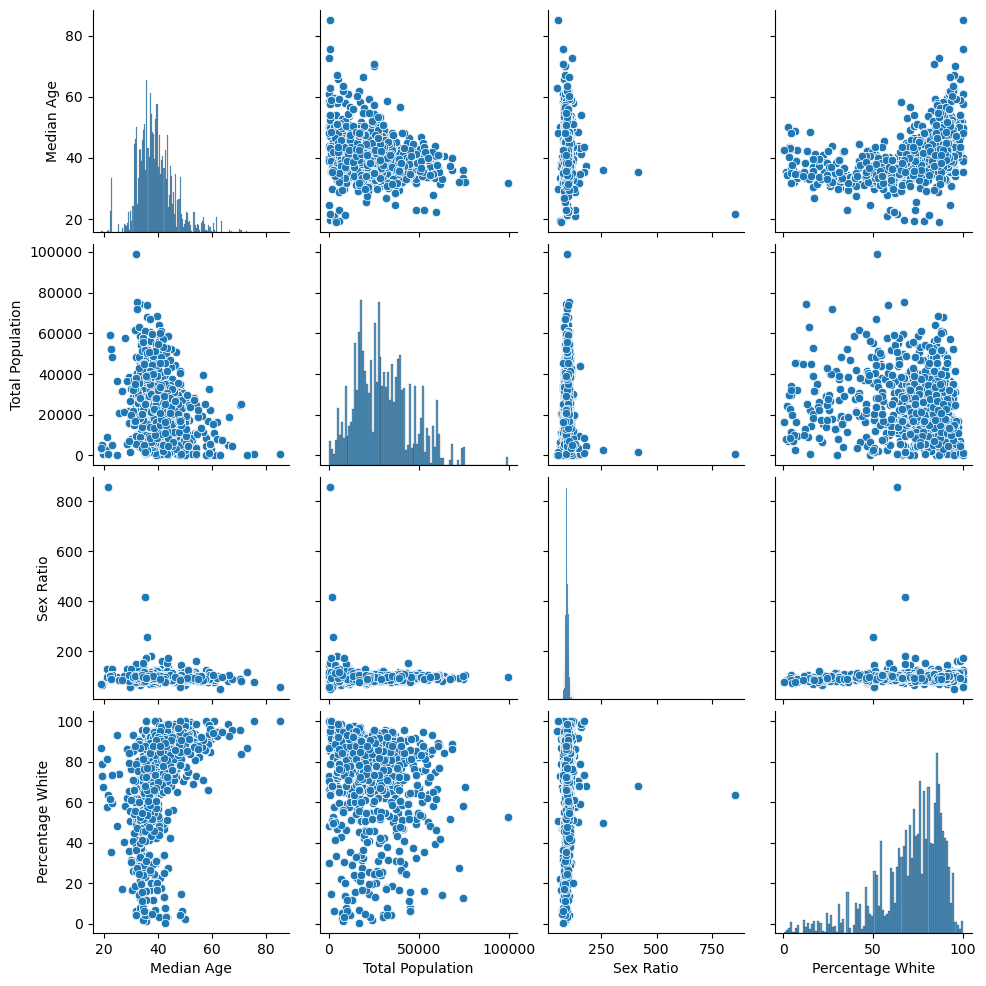

In [321]:
sns.pairplot(df_export[['Median Age', 'Total Population', 'Sex Ratio','Percentage White']])
plt.show()